In [40]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
#library(mgsa)
library(ggplot2)

In [41]:
#MPOA_test<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA_test.rds")
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")

# assgin clusters to cell types

In [42]:
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

# Cell type analysis in each condition

In [43]:
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

# DEG between condition on merged clusters 


In [44]:
DefaultAssay(MPOA.integrated) <- "RNA"

In [45]:
celltype.stim<-vector()
for (i in 1:dim(MPOA.integrated@meta.data)[1]){
    if(MPOA.integrated@meta.data$stim[i]=="AM"){celltype.stim[i]<-"AM"}
    else if(MPOA.integrated@meta.data$stim[i]=="Cast"){celltype.stim[i]<-"Cast"}
        else if(MPOA.integrated@meta.data$stim[i]=="P23M"){celltype.stim[i]<-"P23M"}
             else if(MPOA.integrated@meta.data$stim[i]=="P35M"){celltype.stim[i]<-"P35M"}
         else if(MPOA.integrated@meta.data$stim[i]=="AF"){celltype.stim[i]<-"AF"}
              else if(MPOA.integrated@meta.data$stim[i]=="OVX"){celltype.stim[i]<-"OVX"}
                   else if(MPOA.integrated@meta.data$stim[i]=="P23F"){celltype.stim[i]<-"P23F"}
                       else if(MPOA.integrated@meta.data$stim[i]=="P35F"){celltype.stim[i]<-"P35F"}
        else {celltype.stim[i] <-"others"}
}
MPOA.integrated@meta.data$celltype.stim<-celltype.stim

In [46]:

MPOA.integrated[["celltype"]] <- Idents(object = MPOA.integrated)
Idents(MPOA.integrated = MPOA.integrated) <- MPOA.integrated@meta.data$celltype.stim


In [47]:
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20")
temp<-numeric()
for(i in 1:length(Cell_type)){
    temp<-c(temp,eval(parse(text=paste(Cell_type[i],"_barcode",sep=""))))
}

In [48]:
Cell_type<-c("Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12")

temp<-numeric()
for(i in 1:length(Cell_type)){
    temp<-c(temp,eval(parse(text=paste(Cell_type[i],"_barcode",sep=""))))
}

In [34]:
length(temp)

[1] 13334

In [22]:
# Esr1 M vgat 6 is boarder line
temp<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AM" | stim=="P35M" | stim=="P23M" |stim=="AF"| stim=="P35F"| stim=="P23F"| stim=="Cast"| stim=="OVX")))

In [49]:
#Vglu Esr1
temp<-c(Vglu4_barcode,Vglu5_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AM" | stim=="P35M" | stim=="P23M" |stim=="AF"| stim=="P35F"| stim=="P23F"| stim=="Cast"| stim=="OVX")))

In [8]:
#201119 Ar 
temp<-c(Vgat5_barcode,Vgat8_barcode,Vgat13_barcode)
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AM" | stim=="P35M" | stim=="P23M" |stim=="AF"| stim=="P35F"| stim=="P23F"| stim=="Cast"| stim=="OVX")))

In [50]:
MPOA_Esr1.integrated<-subset(MPOA.integrated,cells=celltype)

In [9]:
MPOA_Ar.integrated<-subset(MPOA.integrated,cells=celltype)

In [35]:
celltype<-intersect(temp,rownames(subset(MPOA.integrated@meta.data,stim=="AM" | stim=="P35M" | stim=="P23M" |stim=="AF"| stim=="P35F"| stim=="P23F"| stim=="Cast"| stim=="OVX")))
MPOA_Vgat.integrated<-subset(MPOA.integrated,cells=celltype)

In [71]:
MPOA_hormone.integrated<-subset(MPOA.integrated,cells=celltype)

# DEG calculation (Esr1 Vgat)

In [47]:
# be careful with the min percentage. for small cluster like Esr1, I used 0.2. for others used 0.1. you could use 0.1 for Esr1 aggregate clusters to see the potential differnces it culd make

In [10]:
help(FindMarkers)

In [56]:
#HB correcton

one.markers <- FindMarkers(MPOA_Esr1.integrated, ident.1 = "Cast", ident.2 ="AM", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Vglu_Esr1/Cast_over_AM/gene_adjust_0.1.xlsx"))
#write.xlsx2(subset(sort_marker,avg_logFC<0 & p_val_adjust<0.05 & pct.2>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_AF/gene_adjust_Vgat_0.1n.xlsx"))
#write.xlsx2(sort_marker,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Vglu_Esr1/AM_over_Cast/All_gene.xlsx"))


In [62]:
#HB correcton

one.markers <- FindMarkers(MPOA_Esr1.integrated, ident.1 = "OVX", ident.2 ="AF", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Vglu_Esr1/OVX_over_AF/gene_adjust_0.1.xlsx"))
#write.xlsx2(subset(sort_marker,avg_logFC<0 & p_val_adjust<0.05 & pct.2>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_AF/gene_adjust_Vgat_0.1n.xlsx"))
#write.xlsx2(sort_marker,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Vglu_Esr1/AM_over_Cast/All_gene.xlsx"))


In [11]:
#HB correcton

one.markers <- FindMarkers(MPOA_Esr1.integrated, ident.1 = "AF", ident.2 ="AM", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_AM/gene_adjust_Vgat_0.1.xlsx"))
write.xlsx2(subset(sort_marker,avg_logFC<0 & p_val_adjust<0.05 & pct.2>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_AM/gene_adjust_Vgat_0.1n.xlsx"))


In [24]:
#HB correcton

one.markers <- FindMarkers(MPOA_Esr1.integrated, ident.1 = "Cast", ident.2 ="OVX", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
#write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/Cast_over_OVX/gene_adjust_Vgat_0.1.xlsx"))
#write.xlsx2(subset(sort_marker,avg_logFC<0 & p_val_adjust<0.05 & pct.2>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/Cast_over_OVX/gene_adjust_Vgat_0.1n.xlsx"))
write.xlsx2(sort_marker,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/Cast_over_OVX/All_gene.xlsx"))

In [25]:
#HB correcton

one.markers <- FindMarkers(MPOA_Esr1.integrated, ident.1 = "OVX", ident.2 ="Cast", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_logFC"]),]
#write.xlsx2(subset(sort_marker,avg_logFC>0 & p_val_adjust<0.05 & pct.1>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/OVX_over_Cast/gene_adjust_Vgat_0.1.xlsx"))
#write.xlsx2(subset(sort_marker,avg_logFC<0 & p_val_adjust<0.05 & pct.2>0.1),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/OVX_over_Cast/gene_adjust_Vgat_0.1n.xlsx"))
write.xlsx2(sort_marker,file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/OVX_over_Cast/All_gene.xlsx"))

# visualization of dimorphic and all other genes

In [4]:
sort_marker<- read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_AF/All_gene.xlsx",sheetIndex=1)

In [5]:
rank<-c(1:dim(sort_marker)[1])
rank<-factor(rank,levels=rank) #probably you do not need this
sort_marker$rank<-rank

In [6]:
color<-numeric()
for(i in 1:dim(sort_marker)[1]){
    if(sort_marker$avg_logFC[i]>0 & sort_marker$p_val_adjust[i]<0.05){
        color[i]<-"darkblue"
    }else if(sort_marker$avg_logFC[i]<0 & sort_marker$p_val_adjust[i]<0.05){
        color[i]<-"salmon"
    }else{
       color[i]<-"black" 
    }
}

In [7]:
sort_marker$color<-color

In [10]:
tail(sort_marker)

,NA.,p_val,avg_logFC,pct.1,pct.2,p_val_adj,p_val_adjust,rank,color
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
15976,Pcp4,2.461578e-20,-0.5153354,0.991,1.000,5.008079e-16,3.932124e-16,15976,salmon
15977,Rps27rt,5.738869e-29,-0.5383111,0.868,0.969,1.167573e-24,9.169564e-25,15977,salmon
15978,Slc18a2,6.964374e-17,-0.5999570,0.166,0.518,1.416902e-12,1.112420e-12,15978,salmon
15979,Esr1,7.576594e-25,-0.6292090,0.664,0.887,1.541458e-20,1.210437e-20,15979,salmon
15980,Fgfr1,3.885375e-05,-0.6301926,0.638,0.693,7.904795e-01,6.119465e-01,15980,black
15981,Xist,1.393834e-90,-2.2884306,0.000,0.992,2.835755e-86,2.227486e-86,15981,salmon


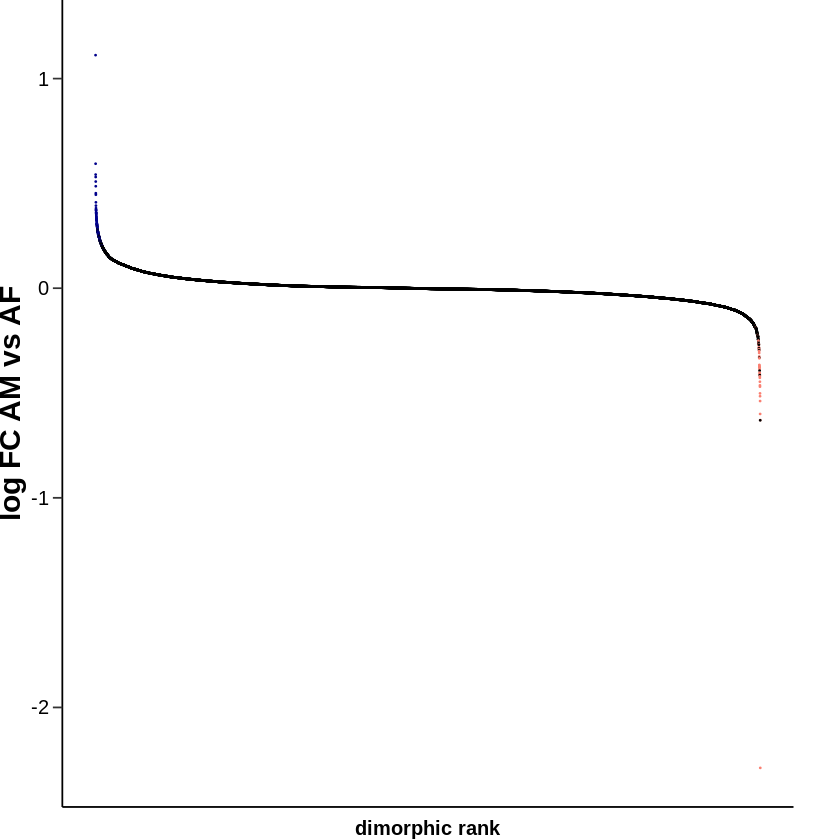

In [13]:
ggplot(sort_marker,aes(x=rank,y=avg_logFC),fill=color)+geom_point(size=0.12,color=color) +xlab("dimorphic rank")+ylab("log FC AM vs AF")+
scale_x_discrete(expand = c(0.05, 0.05))+
theme(axis.text.x=element_blank(),axis.text.y=element_text(size=12, hjust = 1,color="black"),axis.title.y=element_text(size=18,face="bold"),axis.title.x=element_text(size=12,face="bold"),plot.title = element_text(size=15),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.line = element_line(colour = "black",size=0.5),axis.ticks.x=element_blank(),axis.ticks.length=unit(.2, "cm"),axis.ticks = element_line(size = 0.5), plot.margin = margin(0, 28, 0, 0))+ylim(-2.3,1.2)#+xlim(-1,dim(sort_marker)[1]+1)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/dimorphic/dimorphic genes.pdf",width=2.2,height=10,paper="letter")

In [9]:
write.xlsx2(subset(sort_marker, p_val_adjust<0.05),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/dimorphic/dimorphic genes.xlsx"))

# hormone gene in male, female and shared

In [7]:
male_hormone<- read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_Cast/All_gene.xlsx",sheetIndex=1)
rownames(male_hormone)<-male_hormone[,1]
female_hormone<- read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_OVX/All_gene.xlsx",sheetIndex=1)
rownames(female_hormone)<-female_hormone[,1]
dimorphic<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/dimorphic/dimorphic genes.xlsx",sheetIndex=1)
rownames(dimorphic)<-dimorphic[,2]

In [7]:
dimorphic # not used

,NA..1,NA.,p_val,avg_logFC,pct.1,pct.2,p_val_adj,p_val_adjust,rank,color
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Ddx3y,1,Ddx3y,6.856519e-67,1.1118923,0.783,0.000,1.394959e-62,1.095672e-62,1,darkblue
Pcsk1n,2,Pcsk1n,3.230176e-16,0.5939313,0.996,0.988,6.571793e-12,5.158914e-12,2,darkblue
Gm10076,3,Gm10076,3.308051e-25,0.5421433,0.898,0.658,6.730230e-21,5.285274e-21,3,darkblue
Eef1a2,4,Eef1a2,2.414377e-23,0.5304022,0.902,0.665,4.912051e-19,3.856968e-19,4,darkblue
Eif2s3y,5,Eif2s3y,4.825680e-34,0.5088357,0.460,0.000,9.817845e-30,7.710954e-30,5,darkblue
Vsnl1,6,Vsnl1,1.082552e-13,0.4864726,0.821,0.568,2.202451e-09,1.728077e-09,6,darkblue
Lamp5,7,Lamp5,9.889549e-16,0.4533422,0.430,0.125,2.012029e-11,1.579361e-11,7,darkblue
Grik1,8,Grik1,1.072388e-11,0.4459106,0.643,0.366,2.181772e-07,1.710780e-07,8,darkblue
Syn2,9,Syn2,2.875924e-14,0.4097813,0.928,0.829,5.851066e-10,4.591700e-10,9,darkblue


In [8]:
rank<-c(1:dim(male_hormone)[1])
#rank<-factor(rank,levels=rank)
male_hormone$rank<-rank

In [9]:
rank<-c(1:dim(female_hormone)[1])
#rank<-factor(rank,levels=rank)
female_hormone$rank<-rank

In [10]:
common<-intersect(rownames(subset(male_hormone,avg_logFC>0 & p_val_adjust<0.05)),rownames(subset(female_hormone,avg_logFC>0 & p_val_adjust<0.05)))

In [14]:
dim(subset(male_hormone,avg_logFC>0 & p_val_adjust<0.05))
dim(subset(female_hormone,avg_logFC>0 & p_val_adjust<0.05))

[1] 138   8

[1] 176   8

In [11]:
common
length(common)

[1] "Pgr"     "Ptp4a1"  "Nts"     "Parm1"   "Prkce"   "Ogfrl1"  "Irs4"   
 [8] "Nos1"    "Maged1"  "Grik1"   "Tmem35a" "Id4"     "Hpcal1"  "Gfra1"  
[15] "Sez6l"   "Itm2c"   "Irs2"    "Ctnna2"  "Pdzrn4"  "Apoc3"   "Pak3"   
[22] "Sv2c"    "Nexmif"  "Nrip1"   "mt-Co2"  "Ets2"    "Fstl5"   "Drp2"   
[29] "Sytl4"   "Socs2"   "Kcnk2"   "Brinp2"  "Hs3st5"  "Scd2"    "Stk19"  
[36] "Eif1b"   "Col25a1" "Chst11"  "mt-Nd3"  "Gm16485" "Pdcd4"   "Ywhah"  
[43] "Nrp1"    "Scml4"   "Nxn"     "Unc5b"   "Slitrk6"

[1] 47

In [45]:
color<-numeric()
size<-numeric()
for(i in 1:dim(male_hormone)[1]){
    if(male_hormone$avg_logFC[i]>0 & male_hormone$p_val_adjust[i]<0.05 & rownames(male_hormone)[i] %in% common){
        color[i]<-"grey"
        size[i]<-3
    }else if(male_hormone$avg_logFC[i]>0 & male_hormone$p_val_adjust[i]<0.05 & !rownames(male_hormone)[i] %in% common){
        color[i]<-"darkblue"
        size[i]<-3
    }else{
       color[i]<-"black"
        size[i]<-1
    }
}
male_hormone$color<-color
male_hormone$size<-size

In [53]:
color<-numeric()
size<-numeric()
for(i in 1:dim(female_hormone)[1]){
    if(female_hormone$avg_logFC[i]>0 & female_hormone$p_val_adjust[i]<0.05 & rownames(female_hormone)[i] %in% common){
        color[i]<-"grey"
        size[i]<-3
    }else if(female_hormone$avg_logFC[i]>0 & female_hormone$p_val_adjust[i]<0.05 & !rownames(female_hormone)[i] %in% common){
        color[i]<-"salmon"
        size[i]<-3
    }else{
       color[i]<-"black"
        size[i]<-1
    }
}
female_hormone$color<-color
female_hormone$size<-size

In [46]:
male<-subset(male_hormone,avg_logFC>0)

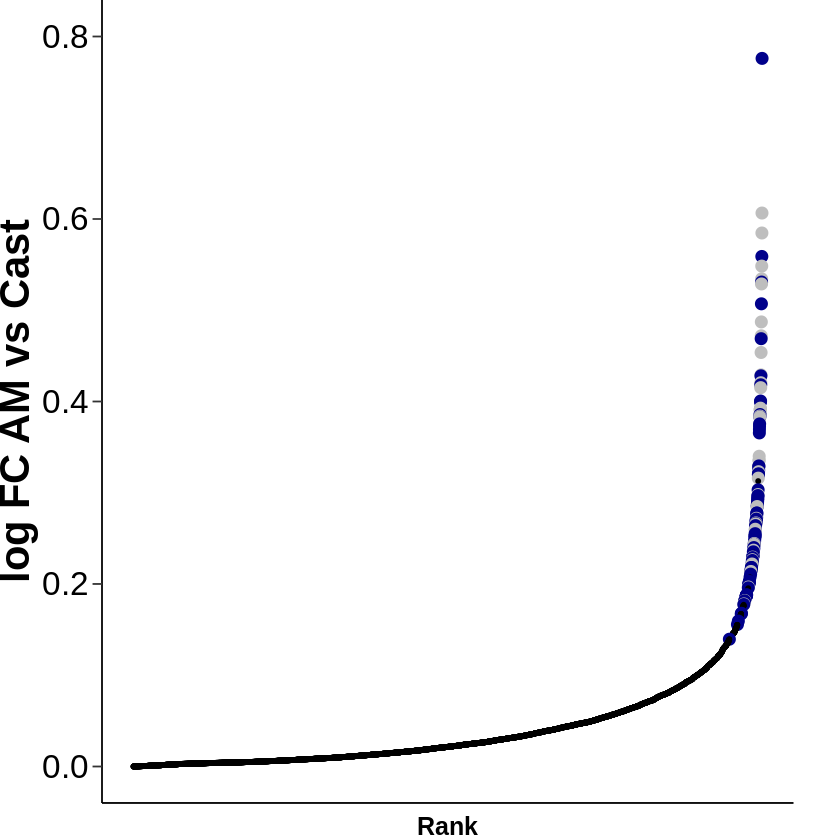

In [48]:
ggplot(male,aes(x=-rank,y=avg_logFC),fill=male$color)+geom_point(size=male$size,color=male$color) +xlab("Rank")+ylab("log FC AM vs Cast")+theme(axis.text.x=element_blank(),axis.text.y=element_text(size=20, hjust = 1,color="black"),axis.title.y=element_text(size=25,face="bold"),axis.title.x=element_text(size=15,face="bold"),plot.title = element_text(size=15),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.line = element_line(colour = "black",size=0.5),axis.ticks.x=element_blank(),axis.ticks.length=unit(.2, "cm"),axis.ticks = element_line(size = 0.5), plot.margin = margin(0, 28, 0, 0))+
ylim(0,0.8)#+xlim(-1,dim(male)[1]+1)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/dimorphic/AM genes_VgatEsr1_vs Cast_blue only grey both_Fig3.pdf",width=5,height=7,paper="letter")

In [87]:
write.xlsx2(subset(male, p_val_adjust<0.05),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/dimorphic/male genes.xlsx"))

In [54]:
female<-subset(female_hormone,avg_logFC>0)

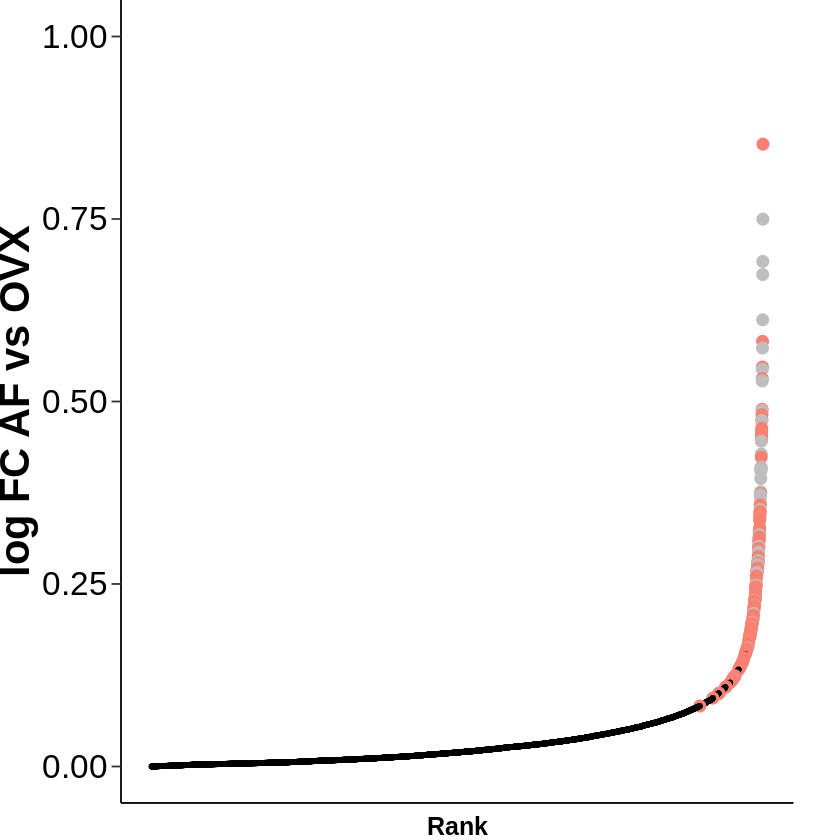

In [55]:
ggplot(female,aes(x=-rank,y=avg_logFC),fill=female$color)+geom_point(size=female$size,color=female$color) +xlab("Rank")+ylab("log FC AF vs OVX")+theme(axis.text.x=element_blank(),axis.text.y=element_text(size=20, hjust = 1,color="black"),axis.title.y=element_text(size=25,face="bold"),axis.title.x=element_text(size=15,face="bold"),plot.title = element_text(size=15),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.line = element_line(colour = "black",size=0.5),axis.ticks.x=element_blank(),axis.ticks.length=unit(.2, "cm"),axis.ticks = element_line(size = 0.5), plot.margin = margin(0, 28, 0, 0))+ylim(0,1)#+xlim(-1,dim(male)[1]+1)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/dimorphic/AF genes_VgatEsr1_vs OVX_salmon only grey both_Fig3.pdf",width=5,height=7)

In [90]:
write.xlsx2(subset(female, p_val_adjust<0.05),file=("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/dimorphic/female genes.xlsx"))